In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

Connecting to the SQLite Database

In [2]:
conn = sqlite3.connect("sales_data.db")

Creating a sales table and inserting sales data

In [4]:
conn.execute('''CREATE TABLE IF NOT EXISTS sales (id INTEGER PRIMARY KEY AUTOINCREMENT, product TEXT, quantity INTEGER, price REAL)''')

In [6]:
sales_data = [('Laptop', 5, 999.99),('Smartphone', 12, 699.99),('Tablet', 8, 299.99),('Laptop', 3, 999.99),('Headphones', 20, 149.99),
('Smartphone', 15, 699.99),('Monitor', 6, 249.99),('Keyboard', 25, 79.99),('Mouse', 30, 39.99),('Tablet', 10, 299.99),('Headphones', 18, 149.99),
('Monitor', 4, 249.99)]
conn.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)
conn.commit()

In [8]:
query = '''SELECT * FROM sales'''
df = pd.read_sql_query(query, conn)
print(df)

    id     product  quantity   price
0    1      Laptop         5  999.99
1    2  Smartphone        12  699.99
2    3      Tablet         8  299.99
3    4      Laptop         3  999.99
4    5  Headphones        20  149.99
5    6  Smartphone        15  699.99
6    7     Monitor         6  249.99
7    8    Keyboard        25   79.99
8    9       Mouse        30   39.99
9   10      Tablet        10  299.99
10  11  Headphones        18  149.99
11  12     Monitor         4  249.99


Query to get total quantity and revenue per product

In [10]:
query = '''SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product'''
df = pd.read_sql_query(query, conn)
print("Sales Summary:")
print(df)

Sales Summary:
      product  total_qty   revenue
0  Headphones         38   5699.62
1    Keyboard         25   1999.75
2      Laptop          8   7999.92
3     Monitor         10   2499.90
4       Mouse         30   1199.70
5  Smartphone         27  18899.73
6      Tablet         18   5399.82


Plotting a simple bar chart for revenue

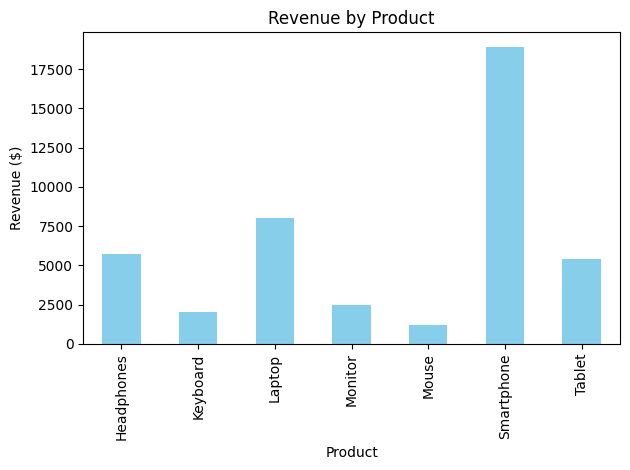

In [11]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [12]:
conn.close()